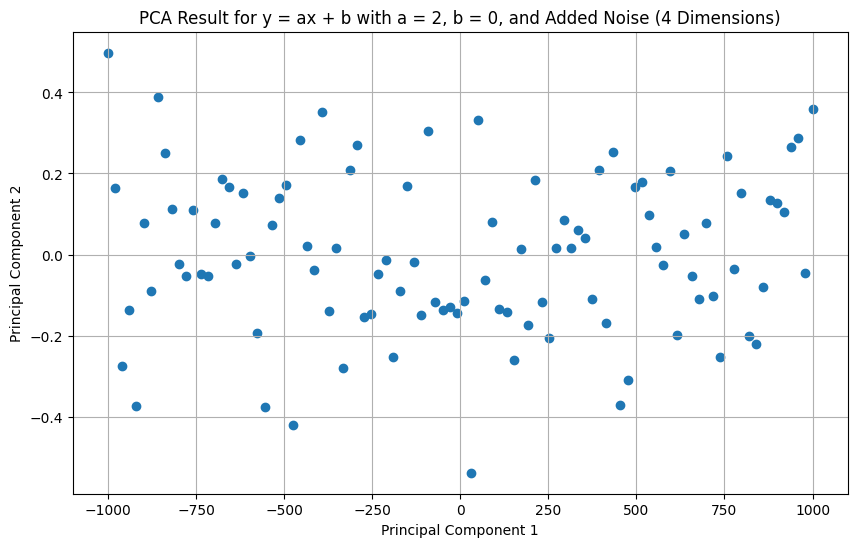

Współczynniki PCA (ładunki):
100
[[ 0.10000217  0.10000119  0.10000327  0.09998079  0.09998094  0.10000264
   0.10000216  0.09998363  0.10003724  0.09997134  0.1000077   0.10003344
   0.10000459  0.10001351  0.10002877  0.09999086  0.09999214  0.09999809
   0.09999044  0.10000222  0.09995665  0.09999898  0.09999029  0.09999644
   0.09998718  0.10001871  0.09999936  0.09999685  0.10003223  0.10000826
   0.09999137  0.10001166  0.09999148  0.10000864  0.09999221  0.10000463
   0.10000751  0.1000156   0.10000641  0.10000603  0.10000736  0.10001136
   0.09999835  0.1000159   0.09998526  0.09999799  0.10002316  0.09999695
   0.09999505  0.10000561  0.09999324  0.09997839  0.09998391  0.10000478
   0.10002095  0.09999748  0.09999088  0.09999499  0.09997864  0.10001884
   0.0999807   0.09997533  0.09997816  0.10000442  0.10000263  0.10001811
   0.09998502  0.09999878  0.09999436  0.09998361  0.09999828  0.10000304
   0.0999994   0.09999123  0.10000011  0.0999705   0.09996487  0.10001347
   0.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generowanie danych
x = np.linspace(0, 100, 100)  # 100 punktów od 0 do 10
coefficients = [2 for i in range(100)]  # współczynniki a = 2
#coefficients = [2, -1/2]  # współczynniki a = 2
b = 5  # wartość b

# Tworzenie wymiarów danych
data = np.array([a * x + b for a in coefficients]).T

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# Dodanie szumu z rozkładu normalnego
noise = np.random.normal(0, 0.1, data.shape)  # szum o średniej 0 i odchyleniu standardowym 0.5
data_noisy = data + noise

# PCA na danych z szumem
pca_noisy_result = pca.fit_transform(data_noisy)

# Wykres
plt.figure(figsize=(10, 6))
plt.scatter(pca_noisy_result[:, 0], pca_noisy_result[:, 1])
plt.title("PCA Result for y = ax + b with a = 2, b = 0, and Added Noise (4 Dimensions)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# Wypisanie współczynników PCA
print("Współczynniki PCA (ładunki):")
print(len(pca.components_[0]))
print(pca.components_)

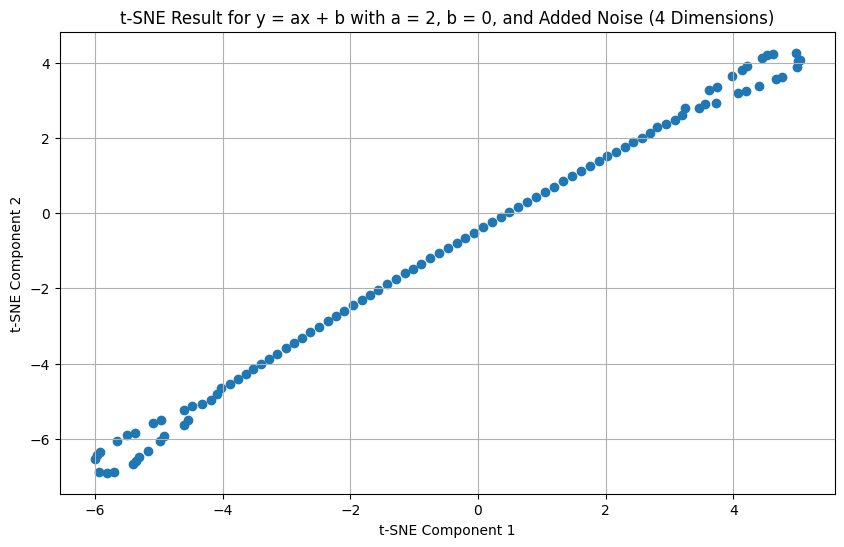

In [21]:
from sklearn.manifold import TSNE

# t-SNE na danych z szumem
tsne_result = TSNE(n_components=2, random_state=42).fit_transform(data_noisy)

# Wykres
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title("t-SNE Result for y = ax + b with a = 2, b = 0, and Added Noise (4 Dimensions)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()

In [ ]:
data = chunks[0]
y_supervised = chunks_y_matrix[0]

centroids, fuzzy_labels, dist, p, fpc, statistics = incremental_semi_supervised_fuzzy_cmeans(data, y_supervised, c = n_clusters, m = m, error=g_error, maxiter=1000, metric = 'euclidean', init_centroid=None)

print('fpc of first chunk', fpc)
diagnosis_chunk = DiagnosisTools()
sil, dav, rand, fpc_test = valid_data_issfcm(chunks_test, centroids, chunks_test_y, m, g_error)
diagnosis_chunk.add_elements(sil, dav, rand, fpc_test)

visualize_all(data, centroids, fuzzy_labels)


In [ ]:
# Dane
diagnosis_iterations = []

# Kolejne trenowanie modelu
for count, chunk in enumerate(chunks):
    if count == 0:
        continue
        
    print("Przetwarzamy chunk ", count)        
    # Dodajemy kolejny chunk do danych

    y_supervised = chunks_y_matrix[count]
    centroids, fuzzy_labels, dist, p, fpc, diagnosis_iteration = incremental_semi_supervised_fuzzy_cmeans(chunk, y_supervised, c = n_clusters, m = m, error=g_error, maxiter=1000, metric = 'euclidean', init_centroid=centroids)

    print('p', p)
    print('fpc', fpc.shape, fpc)

    # Wizualizacja dla pierwszej iteracji
    cluster_labels = np.argmax(fuzzy_labels, axis=0)

    plot_pca(chunk, centroids, fuzzy_labels)
    silhouette_avg, davies_bouldin_avg, rand, fpc_test = valid_data_issfcm(chunks_test, centroids, chunks_test_y, m, g_error)
    
    diagnosis_chunk.add_elements(silhouette_avg, davies_bouldin_avg, fpc_test, rand)
    
    diagnosis_iterations.append(diagnosis_iteration)
